In [1]:
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize
nlp= spacy.load('en_core_web_sm')
import re
from textblob import TextBlob
import seaborn as sns

##### Loading the dataset.

In [2]:
df = pd.read_excel('dataset -P543.xlsx')
df.head()

,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."


##### Checking for missing values and any duplicated rows.

In [3]:
df.isnull().sum()

title     0
rating    0
body      0
dtype: int64

In [4]:
df.duplicated().any()

False

##### Combining the title and body column together.

In [5]:
df['text'] = df['title'].astype(str) +' '+ df['body'].astype(str)

In [6]:
df = df.drop(columns = 'title')
df = df.drop(columns = 'body')

In [7]:
df.head()

,rating,text
0,1,Horrible product Very disappointed with the ov...
1,3,Camera quality is not like 48 megapixel Camera...
2,4,"Overall Got the mobile on the launch date,Batt..."
3,1,A big no from me 1. It doesn't work with 5.0GH...
4,1,Put your money somewhere else Not worth buying...


##### Converting the alphabets into lowercase.

In [8]:
df['text'] = df['text'].str.lower()

In [9]:
df.head()

,rating,text
0,1,horrible product very disappointed with the ov...
1,3,camera quality is not like 48 megapixel camera...
2,4,"overall got the mobile on the launch date,batt..."
3,1,a big no from me 1. it doesn't work with 5.0gh...
4,1,put your money somewhere else not worth buying...


##### Data cleaning

In [10]:
def data_clean(x):
  data = ' '.join(re.findall('\w+',x))
  data1 = nlp(data)
  cleaned_text = [token.lemma_ for token in data1 if not token.is_stop and not token.is_punct and not token.is_bracket and not token.is_digit and not token.is_currency]
  return ' '.join(cleaned_text)

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\saswa\AppData\Local\Temp\ipykernel_19584\2702282498.py:2: SyntaxWarning: invalid escape sequence '\w'
  data = ' '.join(re.findall('\w+',x))


In [11]:
df['text'] = df['text'].apply(data_clean)

In [12]:
df.head()

,rating,text
0,1,horrible product disappointed overall performa...
1,3,camera quality like megapixel camera quality low
2,4,overall get mobile launch date battery appreci...
3,1,big doesn t work 0ghz wifi frequency 4ghz old ...
4,1,money worth buy faulty software poor display q...


##### Removing Hindi/Devnagri entries

In [13]:
def remove_hindi_rows(df, col):
    df_filtered = df[~df[col].astype(str).str.contains(r'[\u0900-\u097F]')]
    return df_filtered

In [14]:
df = remove_hindi_rows(df, 'text')

In [15]:
df.head()

,rating,text
0,1,horrible product disappointed overall performa...
1,3,camera quality like megapixel camera quality low
2,4,overall get mobile launch date battery appreci...
3,1,big doesn t work 0ghz wifi frequency 4ghz old ...
4,1,money worth buy faulty software poor display q...


##### Counting the number of words in text column

In [16]:
df['word_count'] = df['text'].str.split().apply(len)

In [17]:
df.head()

,rating,text,word_count
0,1,horrible product disappointed overall performa...,6
1,3,camera quality like megapixel camera quality low,7
2,4,overall get mobile launch date battery appreci...,37
3,1,big doesn t work 0ghz wifi frequency 4ghz old ...,36
4,1,money worth buy faulty software poor display q...,24


##### Defining a sentiment column based on user rating

In [18]:
df["sentiment"] = df["rating"].apply(lambda x: 2 if x >= 4 else (0 if x <= 2 else 1))

In [19]:
df.head()

,rating,text,word_count,sentiment
0,1,horrible product disappointed overall performa...,6,0
1,3,camera quality like megapixel camera quality low,7,1
2,4,overall get mobile launch date battery appreci...,37,2
3,1,big doesn t work 0ghz wifi frequency 4ghz old ...,36,0
4,1,money worth buy faulty software poor display q...,24,0


##### Visualizing the data

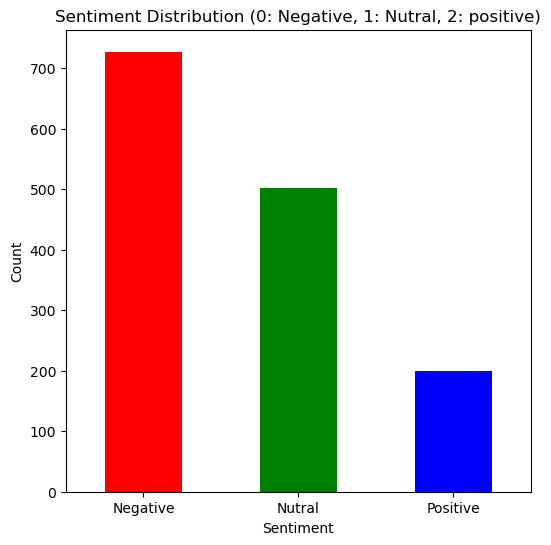

In [20]:
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
sentiment_counts.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Sentiment Distribution (0: Negative, 1: Nutral, 2: positive)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Nutral', 'Positive'], rotation=0)
plt.show()

<Axes: xlabel='word_count', ylabel='Count'>

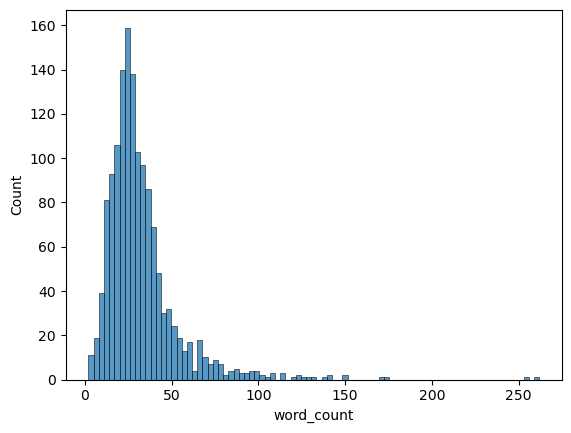

In [21]:
sns.histplot(data = df,x='word_count')

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

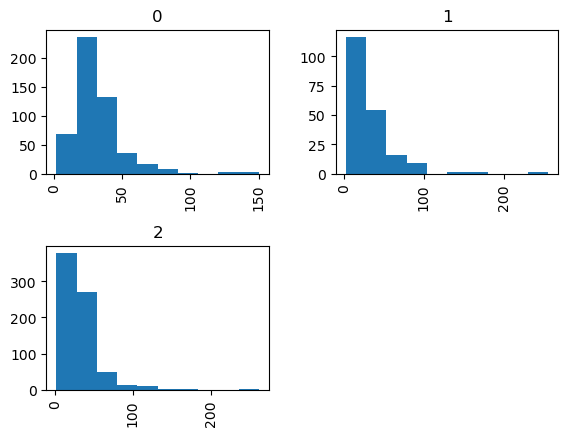

In [22]:
df.hist('word_count',by='sentiment')

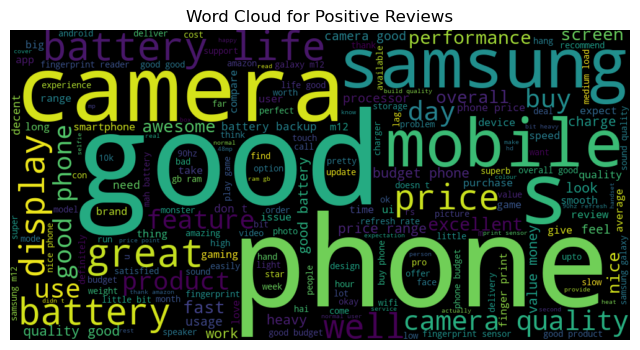

In [23]:
positive_reviews = df[df['sentiment'] == 2]['text']
positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=1000,height=500).generate(positive_text)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

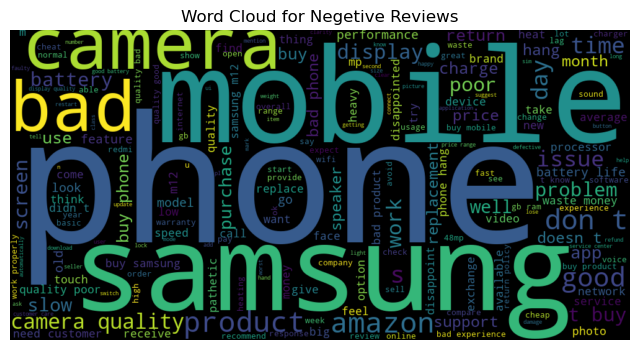

In [24]:
negetive_reviews = df[df['sentiment'] == 0]['text']
negetive_text = ' '.join(negetive_reviews)
wordcloud = WordCloud(width=1000,height=500).generate(negetive_text)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negetive Reviews')
plt.show()

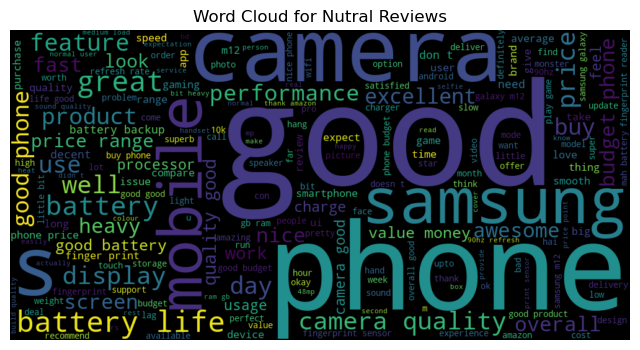

In [25]:
nutral_reviews = df[df['sentiment'] == 2]['text']
nutral_text = ' '.join(nutral_reviews)
wordcloud = WordCloud(width=1000,height=500).generate(nutral_text)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Nutral Reviews')
plt.show()

##### Vectorising and separating feature and target

In [26]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])

In [27]:
Y = df['sentiment']

In [28]:
Y

0       0
1       1
2       2
3       0
4       0
       ..
1435    2
1436    0
1437    2
1438    0
1439    2
Name: sentiment, Length: 1428, dtype: int64

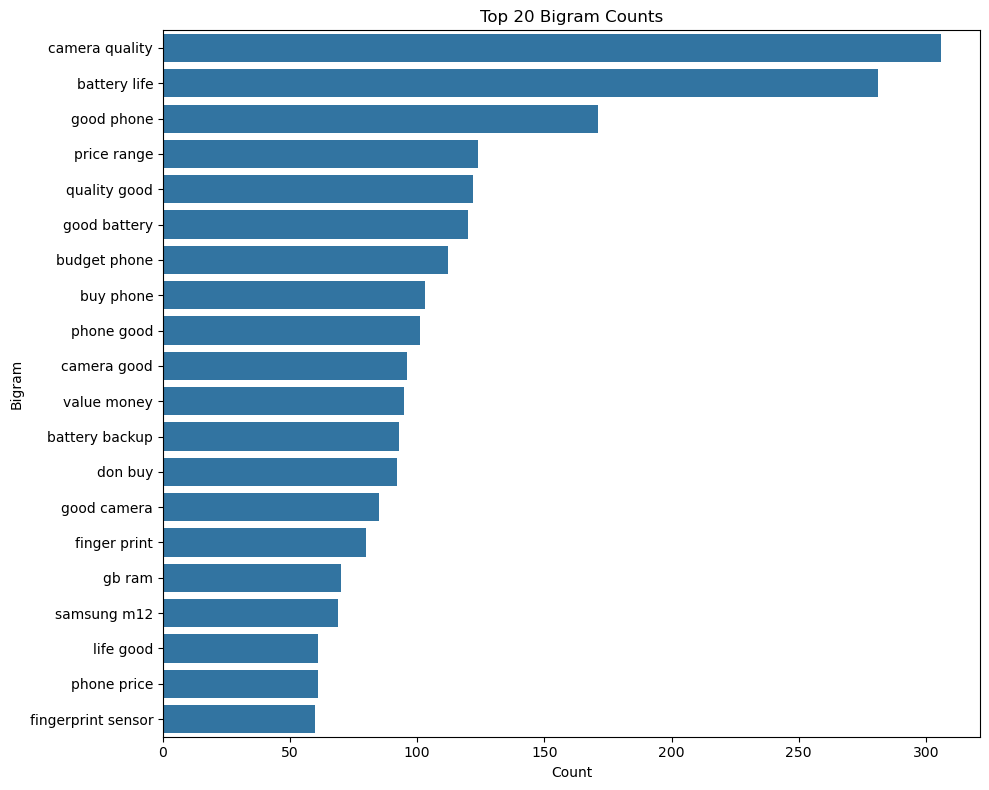

In [29]:
# Create a CountVectorizer object with ngram_range=(2, 2) to extract bigrams

from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(2, 2))
X_bigrams = count_vectorizer.fit_transform(df['text'])

# Create a bar chart of the top 20 bigram counts

word_counts = X_bigrams.sum(axis=0)
word_counts = pd.DataFrame(word_counts,columns = count_vectorizer.get_feature_names_out())

bigrams = count_vectorizer.get_feature_names_out()
counts = X_bigrams.sum(axis=0).tolist()[0]

bigram_freq = dict(zip(bigrams, counts))

sorted_bigrams = sorted(bigram_freq.items(), key=lambda item: item[1], reverse=True)

top_20_bigrams = sorted_bigrams[:20]

plt.figure(figsize=(10, 8))
sns.barplot(x=[count for bigram, count in top_20_bigrams], y=[bigram for bigram, count in top_20_bigrams], orient='h')
plt.title('Top 20 Bigram Counts')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.tight_layout()
plt.show()

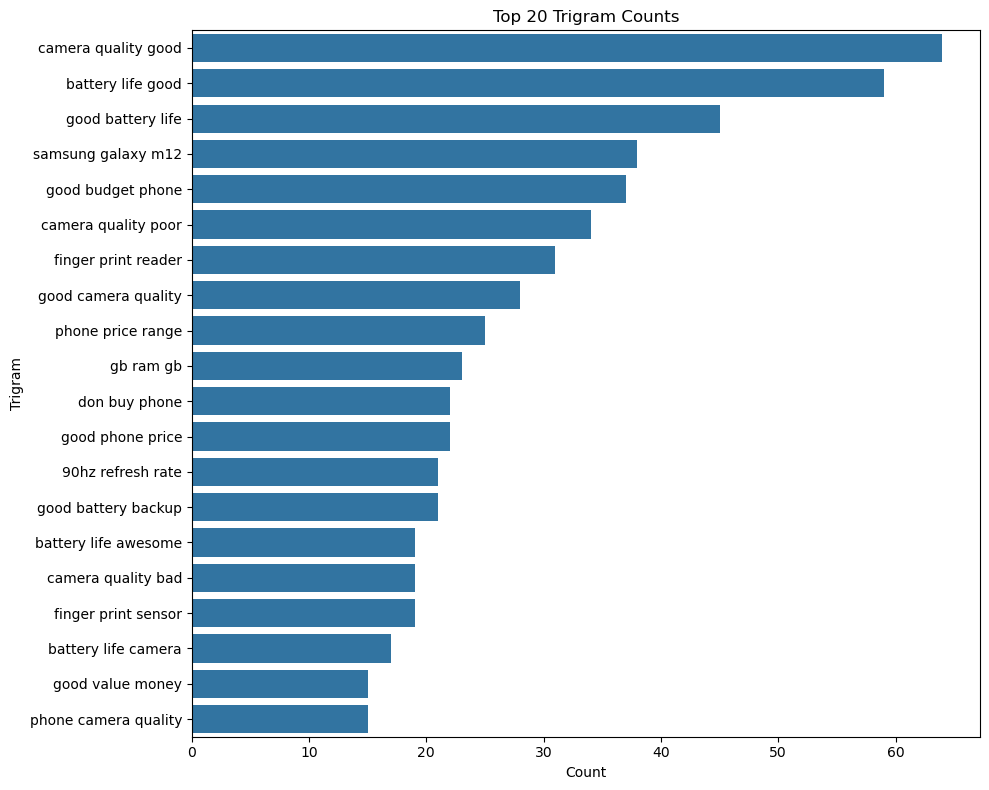

In [30]:
# Create a CountVectorizer object with ngram_range=(3, 3) to extract bigrams

count_vectorizer_trigrams = CountVectorizer(ngram_range=(3, 3))
X_trigrams = count_vectorizer_trigrams.fit_transform(df['text'])

trigrams = count_vectorizer_trigrams.get_feature_names_out()
counts_trigrams = X_trigrams.sum(axis=0).tolist()[0]

trigram_freq = dict(zip(trigrams, counts_trigrams))

sorted_trigrams = sorted(trigram_freq.items(), key=lambda item: item[1], reverse=True)

top_20_trigrams = sorted_trigrams[:20]

plt.figure(figsize=(10, 8))
sns.barplot(x=[count for trigram, count in top_20_trigrams], y=[trigram for trigram, count in top_20_trigrams], orient='h')
plt.title('Top 20 Trigram Counts')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.tight_layout()
plt.show()


# **Model Building and Evaluation**

## Model 1 : Logistic Regression

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, Y_train)

# Make predictions on the test set
lr_y_pred = lr_model.predict(X_test)

In [34]:
# Evaluate the Logistic Regression model
print("\nLogistic Regression Model Evaluation:")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, lr_y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, lr_y_pred))

print("\nAccuracy Score:")
print(accuracy_score(Y_test, lr_y_pred))


Logistic Regression Model Evaluation:
Confusion Matrix:
[[ 82   2  13]
 [ 11   2  22]
 [  5   1 148]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84        97
           1       0.40      0.06      0.10        35
           2       0.81      0.96      0.88       154

    accuracy                           0.81       286
   macro avg       0.68      0.62      0.61       286
weighted avg       0.77      0.81      0.77       286


Accuracy Score:
0.8111888111888111


## Model 2 : Naive Bayes

In [35]:

from sklearn.naive_bayes import MultinomialNB


# Initialize and train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [36]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(Y_test, y_pred))

Confusion Matrix:
[[ 64   0  33]
 [  3   0  32]
 [  0   0 154]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.66      0.78        97
           1       0.00      0.00      0.00        35
           2       0.70      1.00      0.83       154

    accuracy                           0.76       286
   macro avg       0.55      0.55      0.54       286
weighted avg       0.70      0.76      0.71       286


Accuracy Score:
0.7622377622377622


## Model 3 : Support Vector Machine (SVM)

In [37]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, Y_train)

# Make predictions on the test set
svm_y_pred = svm_model.predict(X_test)

In [38]:
# Evaluate the SVM model
print("\nSVM Model Evaluation:")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, svm_y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, svm_y_pred))

print("\nAccuracy Score:")
print(accuracy_score(Y_test, svm_y_pred))


SVM Model Evaluation:
Confusion Matrix:
[[ 82   6   9]
 [ 10   3  22]
 [  4   2 148]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        97
           1       0.27      0.09      0.13        35
           2       0.83      0.96      0.89       154

    accuracy                           0.81       286
   macro avg       0.65      0.63      0.62       286
weighted avg       0.77      0.81      0.78       286


Accuracy Score:
0.8146853146853147


## Model 4 : Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

In [40]:
# Evaluate the Random Forest model
print("\nRandom Forest Model Evaluation:")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, rf_y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, rf_y_pred))

print("\nAccuracy Score:")
print(accuracy_score(Y_test, rf_y_pred))


Random Forest Model Evaluation:
Confusion Matrix:
[[ 78   1  18]
 [ 12   0  23]
 [  6   0 148]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        97
           1       0.00      0.00      0.00        35
           2       0.78      0.96      0.86       154

    accuracy                           0.79       286
   macro avg       0.53      0.59      0.56       286
weighted avg       0.70      0.79      0.74       286


Accuracy Score:
0.7902097902097902


In [41]:
import pickle

In [42]:
file = 'model1.pkl'

In [43]:
pickle.dump(svm_model,open(file,'wb'))

In [44]:
file = 'model2.pkl'

In [45]:
pickle.dump(vectorizer,open(file,'wb'))